In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as tick
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('hotel_booking.csv')
df = data.copy()

Data checking for 
missing value, duplicate value, data type, statics, categorical and numerical value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

lets change the data type of the reservation status date from objects to datetime

In [4]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390.0,0.370416,0.0,0.0,0.0,1.0,1.0,0.482918
lead_time,119390.0,104.011416,0.0,18.0,69.0,160.0,737.0,106.863097
arrival_date_year,119390.0,2016.156554,2015.0,2016.0,2016.0,2017.0,2017.0,0.707476
arrival_date_week_number,119390.0,27.165173,1.0,16.0,28.0,38.0,53.0,13.605138
arrival_date_day_of_month,119390.0,15.798241,1.0,8.0,16.0,23.0,31.0,8.780829
stays_in_weekend_nights,119390.0,0.927599,0.0,0.0,1.0,2.0,19.0,0.998613
stays_in_week_nights,119390.0,2.500302,0.0,1.0,2.0,3.0,50.0,1.908286
adults,119390.0,1.856403,0.0,2.0,2.0,2.0,55.0,0.579261
children,119386.0,0.10389,0.0,0.0,0.0,0.0,10.0,0.398561
babies,119390.0,0.007949,0.0,0.0,0.0,0.0,10.0,0.097436


In [6]:
for i in df.describe(include='object').columns:
    print(df[i].unique())
    print('\n')

['Resort Hotel' 'City Hotel']


['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


['BB' 'FB' 'HB' 'SC' 'Undefined']


['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD

some columns have missing values lets check that

In [7]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

agent and company have too much missing value so we might want to change that using fill

In [8]:
df[['agent', 'company']] = df[['agent', 'company']].fillna(0.0)

In [9]:
df['country'].fillna(df.country.mode().to_string(),inplace= True)
df['children'].fillna(round(df.children.mean()), inplace= True)

In [10]:
df.isnull().sum().sort_values(ascending=False)[:10]

hotel                   0
is_canceled             0
assigned_room_type      0
booking_changes         0
deposit_type            0
agent                   0
company                 0
days_in_waiting_list    0
customer_type           0
adr                     0
dtype: int64

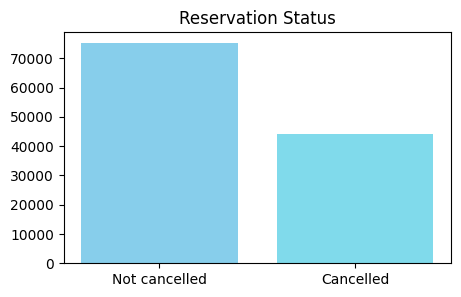

In [11]:
color = sns.color_palette(['#87ceeb', '#80daeb'])
plt.figure(figsize= (5,3))
plt.title('Reservation Status')
plt.bar(['Not cancelled', 'Cancelled'], df['is_canceled'].value_counts(), color=color )
plt.show()

It is clear that more than 35% of the client chose to cancel their reservation

lets check the cancelation based on the hotel

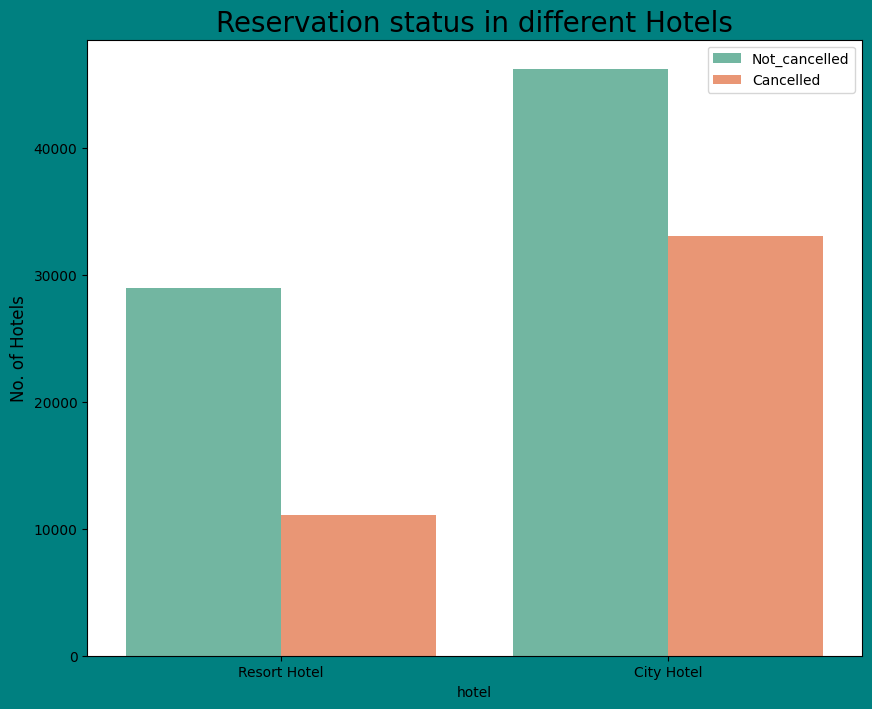

In [12]:
plt.figure(figsize=(10,8), facecolor= '#008080')
ax = sns.countplot(x= 'hotel', hue= 'is_canceled', data= df, palette= 'Set2' )
legend_, _ = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor= (1,1))
plt.title('Reservation status in different Hotels', size= 20)
plt.ylabel('No. of Hotels', size= 12)
plt.legend(['Not_cancelled', 'Cancelled'])
plt.show()

City resort have more booking

In [13]:
print('Resort Hotel')
resort_hotel = df[df['hotel']== 'Resort Hotel']
print(resort_hotel['is_canceled'].value_counts(normalize=True))
print('\n')
print('City Hotel')
city_resort = df[df['hotel']== 'City Hotel']
print(city_resort['is_canceled'].value_counts(normalize=True))

Resort Hotel
is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64


City Hotel
is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64


City cancellation rate is quite high 41% as compared to the resort hotel which is only 27%

In [14]:
year = df['arrival_date_year'].value_counts()
x = year.index
y = year/year.sum()*100

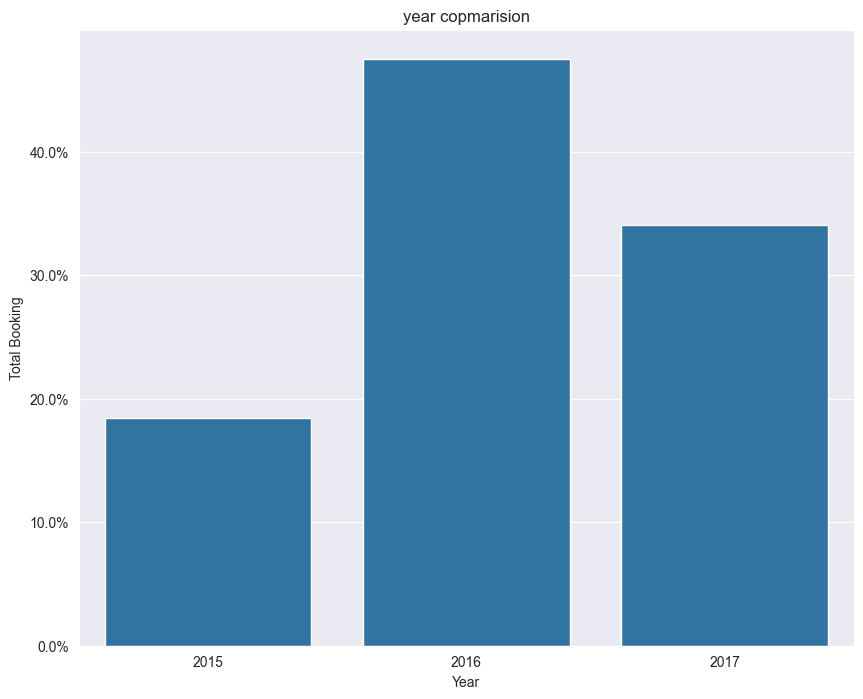

In [15]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.set_major_formatter(tick.PercentFormatter())
ax.set_xlabel('Year')
ax.set_ylabel('Total Booking')
ax.set_title('year copmarision')
sns.barplot(x=x,y=y, ax=ax)
plt.show()

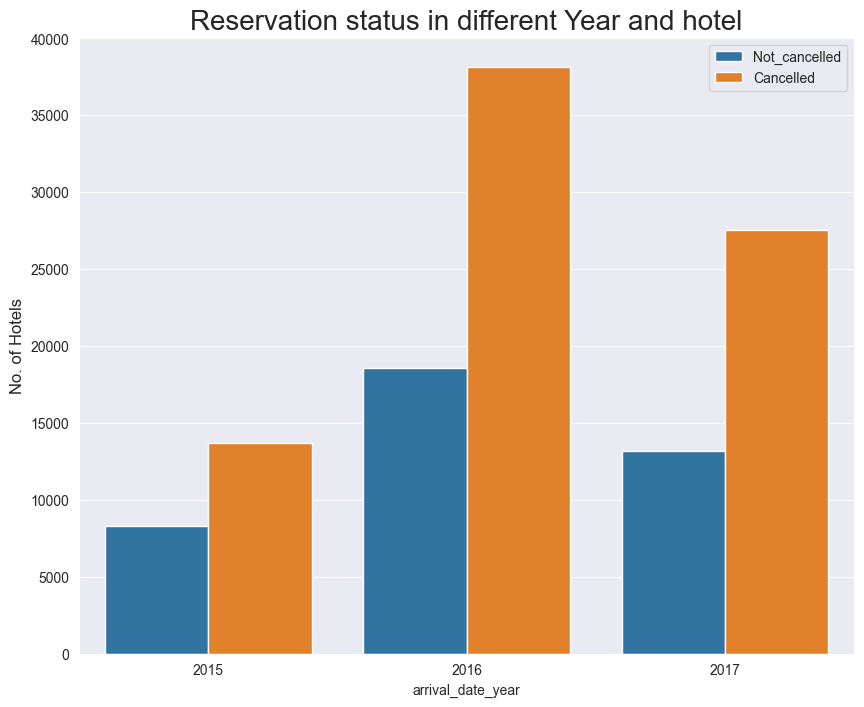

In [16]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='arrival_date_year', hue= 'hotel', data= df)
legend_, _ = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor= (1,1))
plt.title('Reservation status in different Year and hotel', size= 20)
plt.ylabel('No. of Hotels', size= 12)
plt.legend(['Not_cancelled', 'Cancelled'])
plt.show()

In [17]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
months = df['arrival_date_month'].value_counts().reindex(new_order)
x = months.index
y = months/months.sum()*100

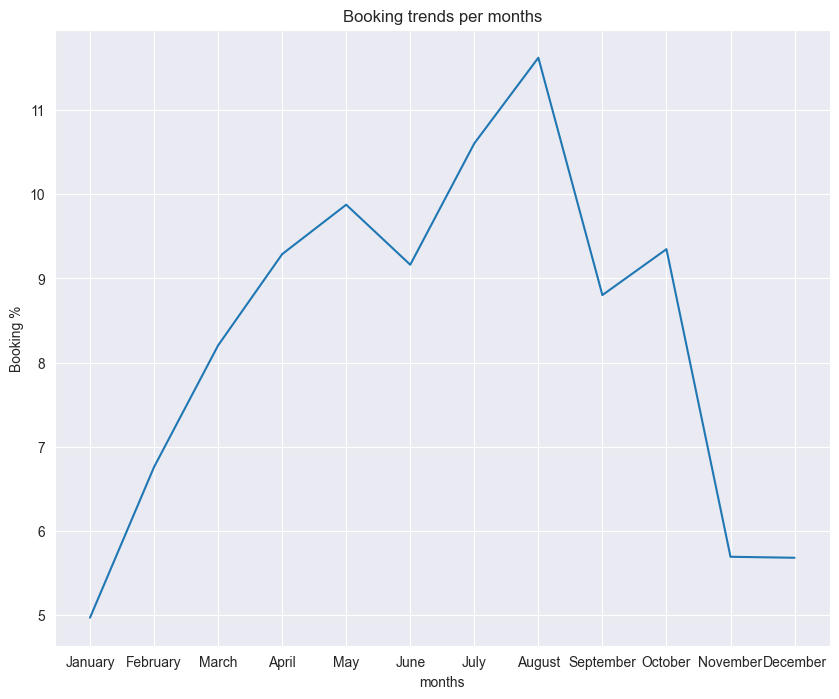

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('months')
ax.set_ylabel('Booking %')
ax.set_title('Booking trends per months')
sns.lineplot(x=x, y=y, ax=ax)
plt.show()

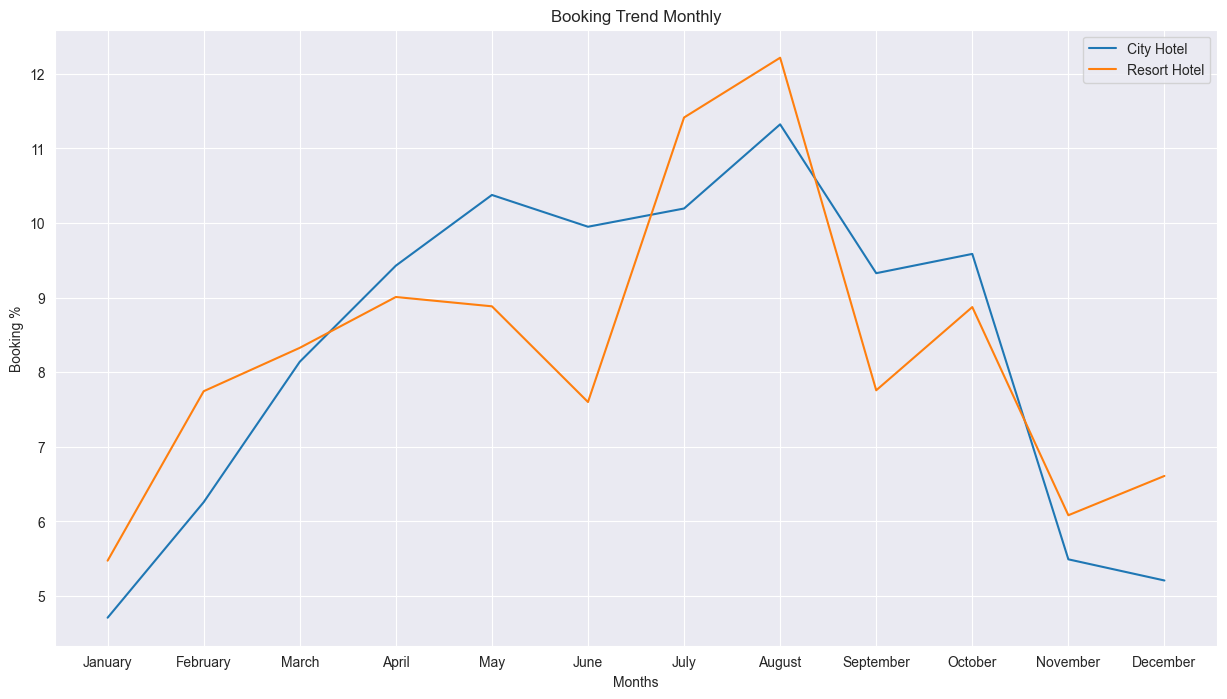

In [19]:
months = df.loc[df.hotel == 'City Hotel', 'arrival_date_month'].value_counts().reindex(new_order)
x1 = months.index
y1 = months/months.sum()*100
months = df.loc[df.hotel == 'Resort Hotel', 'arrival_date_month'].value_counts().reindex(new_order)
x2 = months.index
y2 = months/months.sum()*100

plt.figure(figsize=(15,8))
plt.xlabel('Months')
plt.ylabel('Booking %')
plt.title('Booking Trend Monthly')

sns.lineplot(x=x1, y=y1, label='City Hotel')
sns.lineplot(x=x2, y=y2, label='Resort Hotel')
plt.show()

In [20]:
country = df['country'].value_counts()[:10]
x = country.index
y = country/country.sum()*100

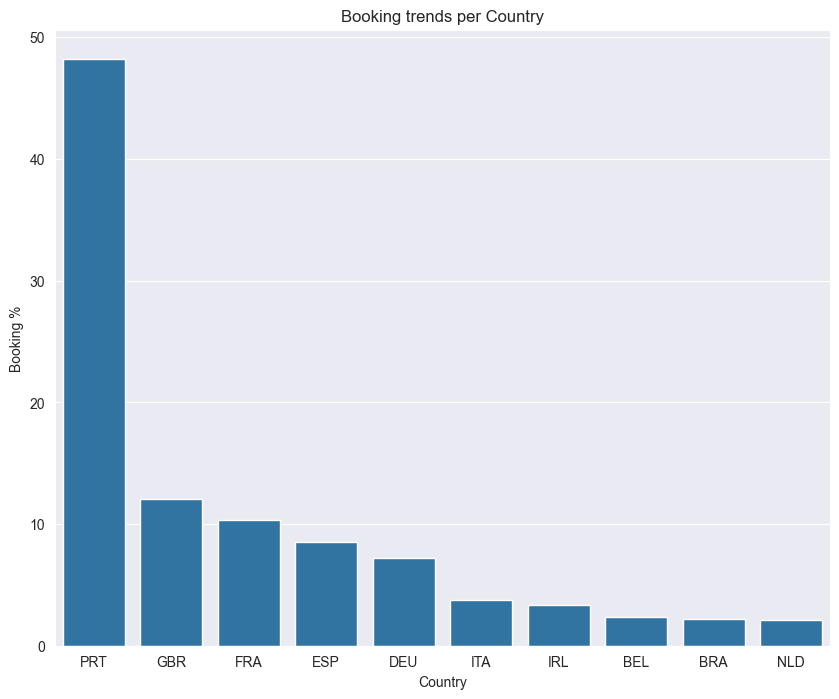

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('Country')
ax.set_ylabel('Booking %')
ax.set_title('Booking trends per Country')
sns.barplot(x=x, y=y, ax=ax)
plt.show()

In [22]:
night_stayed = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
day = night_stayed.value_counts()[:10]
x = day.index
y = day/day.sum()*100

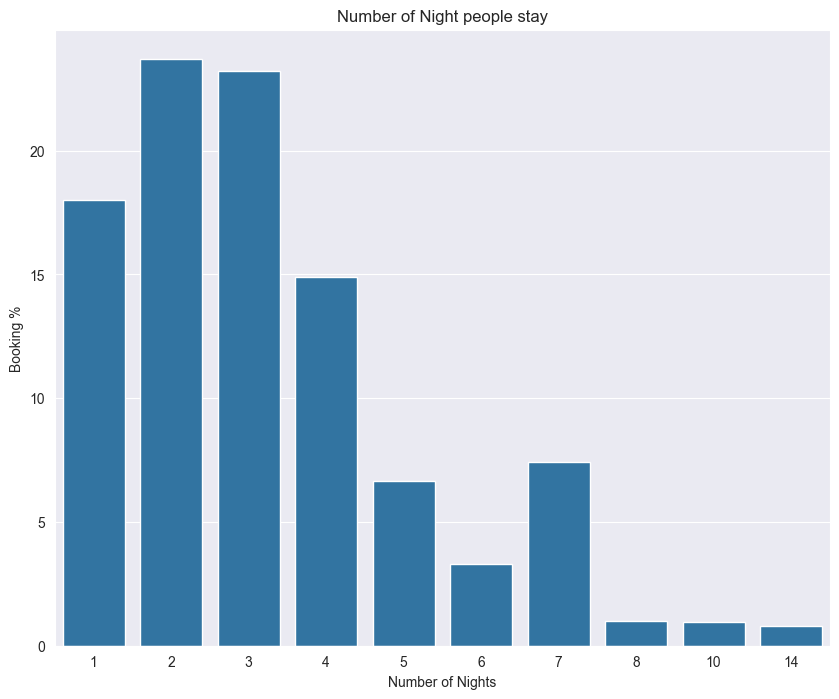

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('Number of Nights')
ax.set_ylabel('Booking %')
ax.set_title('Number of Night people stay')
sns.barplot(x=x, y=y, ax=ax)
plt.show()

<Axes: title={'center': 'Hotel wise night stay duration'}, xlabel='No. of nights', ylabel='count'>

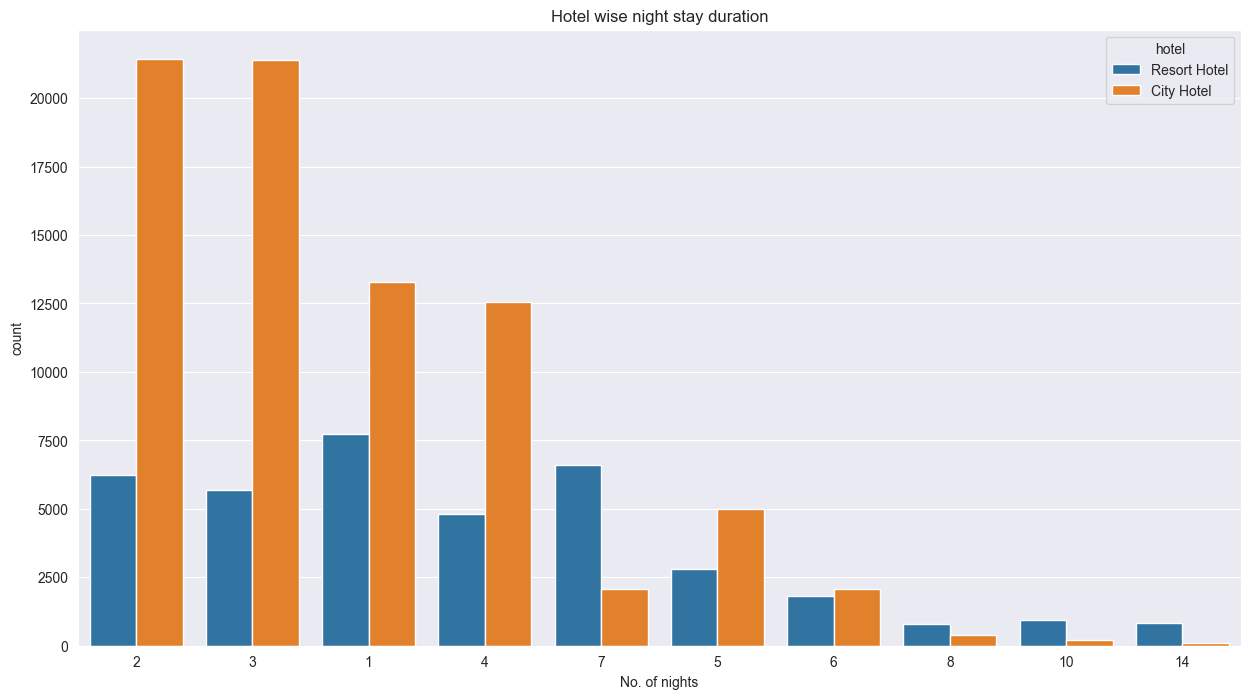

In [24]:
df.loc[:,'night_stayed']  = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel('No. of nights')
ax.set_title('Hotel wise night stay duration')
sns.countplot(x='night_stayed', hue='hotel', data= df, order=df.night_stayed.value_counts().iloc[:10].index, ax=ax)

In [25]:
single   = df[(df.adults==1) & (df.children==0) & (df.babies==0)]
couple   = df[(df.adults==2) & (df.children==0) & (df.babies==0)]
family   = df[df.adults + df.children + df.babies > 2]

names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df.shape[0]*100 for x in count]

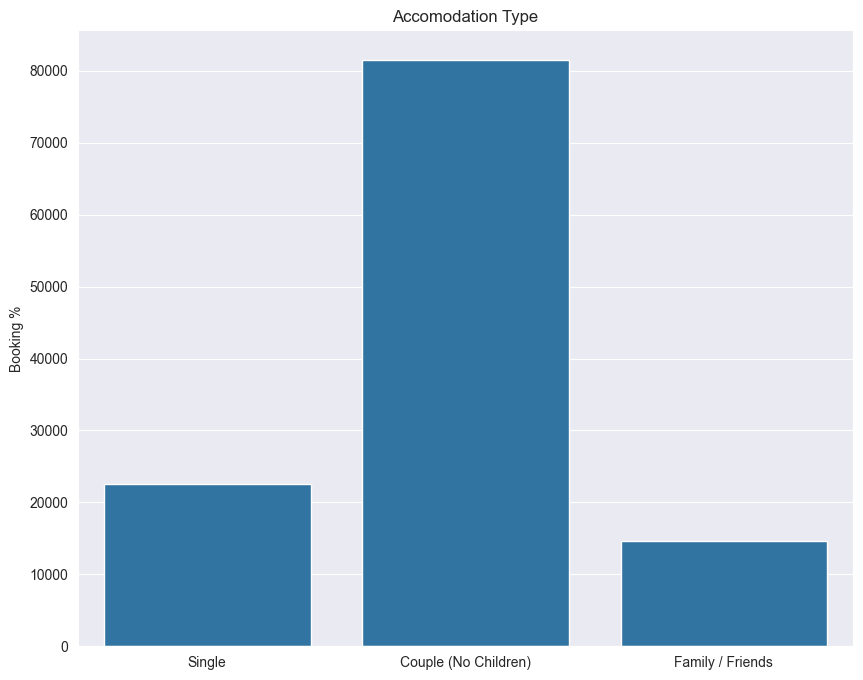

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Booking %')
ax.set_title('Accomodation Type')
sns.barplot(x=names, y=count, ax=ax)
plt.show()

In [27]:
df['room'] = 0
df.loc[ df['reserved_room_type'] == df['assigned_room_type'] , 'Room'] = 1

df['net_cancelled'] = 0
df.loc[ df['previous_cancellations'] > df['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [28]:
df = df.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)


In [29]:
df.drop(['reservation_status'], inplace=True, axis=1)

<Axes: >

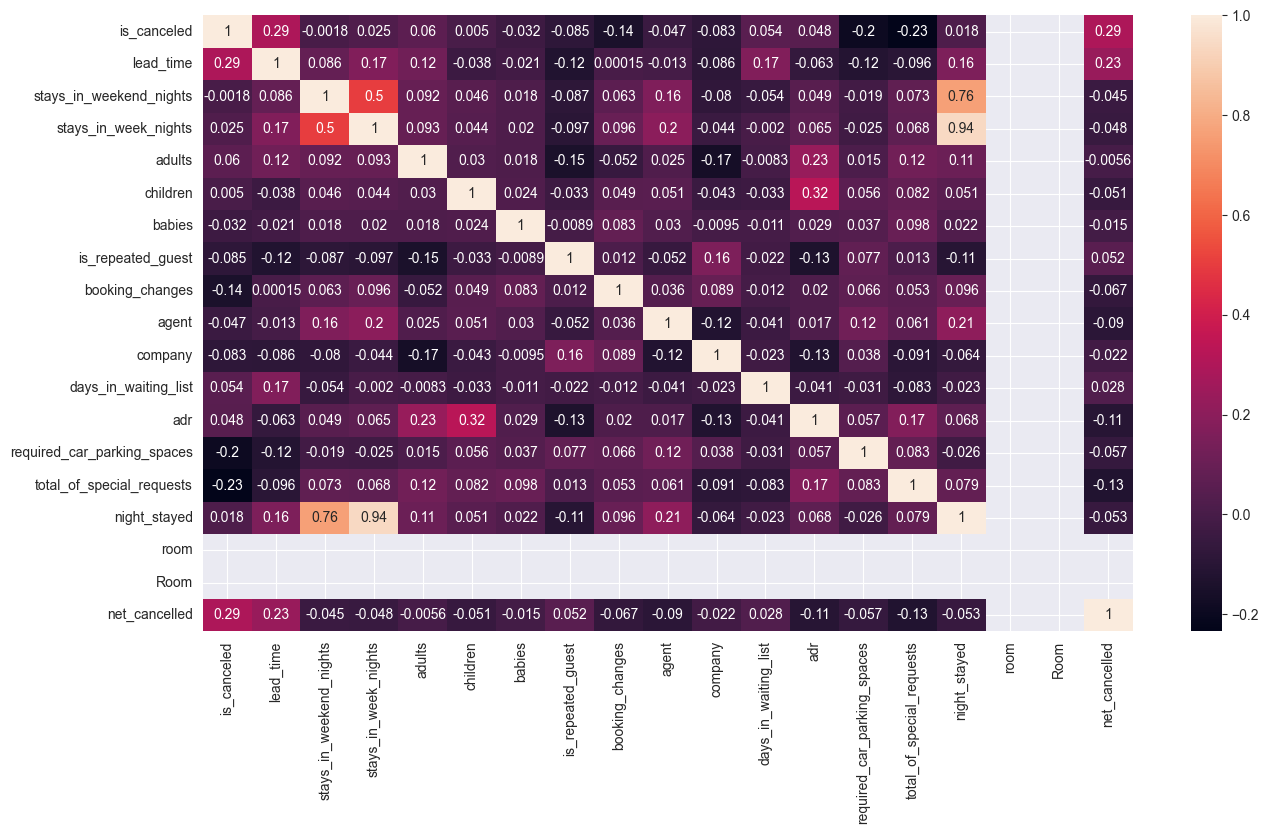

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
numerical_features = df.select_dtypes(exclude= object)
sns.heatmap(numerical_features.corr(), annot=True, ax=ax)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
for col in df.select_dtypes(include= object).columns:
    df[col] = le.fit_transform(df[col])


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [35]:
xp_train, xp_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn import metrics

In [38]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics 
    y_pred = model.predict(x_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [39]:
x_train = xp_train.drop(columns=['room', 'Room','babies'])
x_test = xp_test.drop(columns=['room', 'Room','babies'])

In [40]:
rfc = RandomForestClassifier()
rfc.fit(xp_train, y_train)
rf = evaluate_model(rfc, xp_test, y_test)
print('------------ Random Forest')
print('Accuracy:', rf['acc'])
print('Precision:', rf['prec'])
print('Recall:', rf['rec'])
print('F1 Score:', rf['f1'])
print('Cohens Kappa Score:', rf['kappa'])
print('Area Under Curve:', rf['auc'])
print('Confusion Matrix:\n',rf['cm'])

------------ Random Forest
Accuracy: 0.8713481640310908
Precision: 0.8732038048977939
Recall: 0.7693473609129815
F1 Score: 0.8179922267513509
Cohens Kappa Score: 0.7191190081617393
Area Under Curve: 0.9419831377987591
Confusion Matrix:
 [[17379  1253]
 [ 2587  8629]]


0. Feature: hotel, Score: 0.00882
1. Feature: lead_time, Score: 0.11317
2. Feature: stays_in_weekend_nights, Score: 0.01509
3. Feature: stays_in_week_nights, Score: 0.02311
4. Feature: adults, Score: 0.01172
5. Feature: children, Score: 0.00600
6. Feature: babies, Score: 0.00071
7. Feature: meal, Score: 0.01135
8. Feature: country, Score: 0.10480
9. Feature: market_segment, Score: 0.05127
10. Feature: distribution_channel, Score: 0.01039
11. Feature: is_repeated_guest, Score: 0.00240
12. Feature: booking_changes, Score: 0.01886
13. Feature: deposit_type, Score: 0.11181
14. Feature: agent, Score: 0.05731
15. Feature: company, Score: 0.00372
16. Feature: days_in_waiting_list, Score: 0.00247
17. Feature: customer_type, Score: 0.02713
18. Feature: adr, Score: 0.06911
19. Feature: required_car_parking_spaces, Score: 0.02250
20. Feature: total_of_special_requests, Score: 0.05500
21. Feature: name, Score: 0.05040
22. Feature: email, Score: 0.05073
23. Feature: phone-number, Score: 0.05233
24.

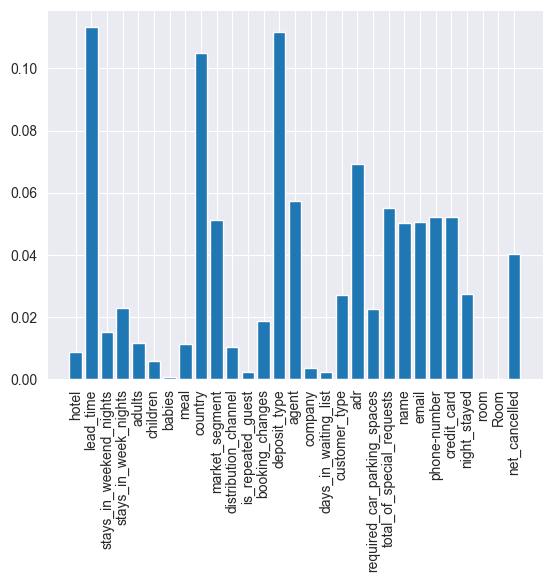

In [41]:
imp = rfc.feature_importances_
columns = xp_train.columns
for i,v in enumerate(imp):
    print('%s. Feature: %0s, Score: %.5f' % (i, columns[i],v))

plt.bar([x for x in columns], imp)
plt.xticks(rotation=90)
plt.show()

room, Room and babies are too less a feature

In [42]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
model = [dtc, rfc, nb, knn]
model_name = ['Decision Tree', 'Random Forest', 'Gaussian Naive', 'KNN classification']
dtc_eval, rfc_eval, nb_eval, knn_eval = {}, {}, {}, {}
m_eval = [dtc_eval, rfc_eval, nb_eval, knn_eval]
for mn, i in enumerate(model):
    i.fit(x_train, y_train)

    i = evaluate_model(i, x_test, y_test)
    print('------------', model_name[mn])
    print('Accuracy:', i['acc'])
    print('Precision:', i['prec'])
    print('Recall:', i['rec'])
    print('F1 Score:', i['f1'])
    print('Cohens Kappa Score:', i['kappa'])
    print('Area Under Curve:', i['auc'])
    print('Confusion Matrix:\n', i['cm'])
    m_eval[mn] = i

------------ Decision Tree
Accuracy: 0.8204569820423478
Precision: 0.7612632705861362
Recall: 0.7607881597717546
F1 Score: 0.7610256410256411
Cohens Kappa Score: 0.6172409514909355
Area Under Curve: 0.8085821434324638
Confusion Matrix:
 [[15956  2676]
 [ 2683  8533]]
------------ Random Forest
Accuracy: 0.8699410345751809
Precision: 0.868616807398472
Recall: 0.7704172610556348
F1 Score: 0.8165753165753166
Cohens Kappa Score: 0.7163870576516822
Area Under Curve: 0.9424496543420152
Confusion Matrix:
 [[17325  1307]
 [ 2575  8641]]
------------ Gaussian Naive
Accuracy: 0.7148887697668186
Precision: 0.6297966231772832
Recall: 0.5853245363766049
F1 Score: 0.6067467652495379
Cohens Kappa Score: 0.3835984368377492
Area Under Curve: 0.7498353212058588
Confusion Matrix:
 [[14773  3859]
 [ 4651  6565]]
------------ KNN classification
Accuracy: 0.5633878316805147
Precision: 0.3831101956745623
Recall: 0.2653352353780314
F1 Score: 0.31352718078381797
Cohens Kappa Score: 0.008673981757236549
Area Un

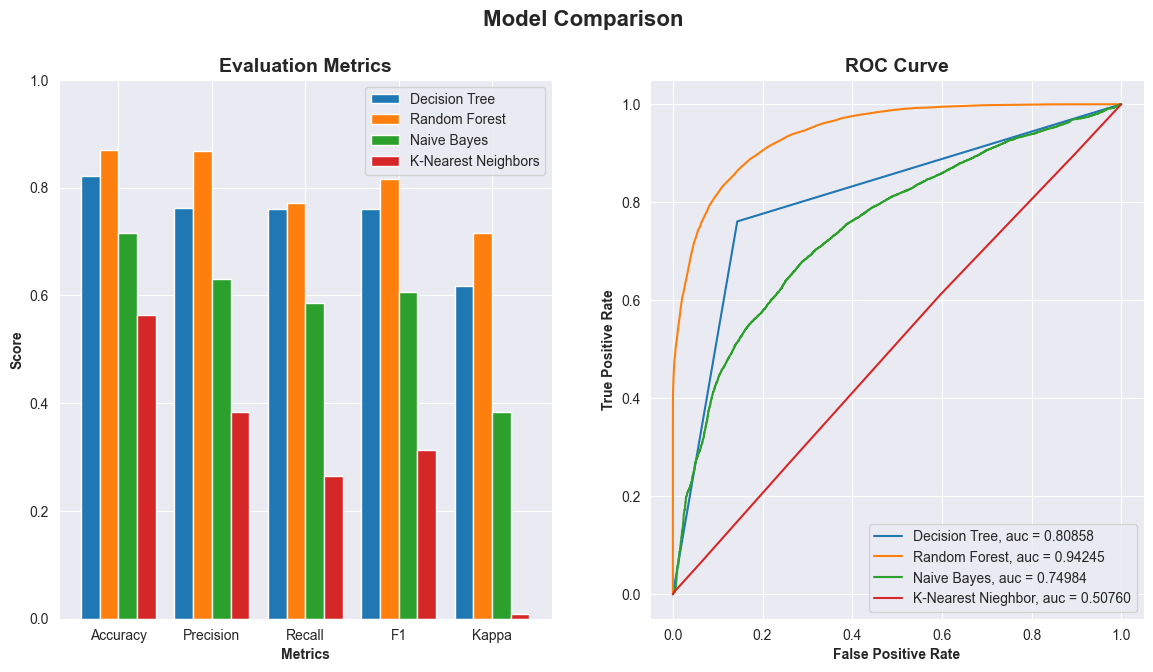

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

barWidth = 0.2
dtc_score = [m_eval[0]['acc'], m_eval[0]['prec'], m_eval[0]['rec'], m_eval[0]['f1'], m_eval[0]['kappa']]
rf_score = [m_eval[1]['acc'], m_eval[1]['prec'], m_eval[1]['rec'], m_eval[1]['f1'], m_eval[1]['kappa']]
nb_score = [m_eval[2]['acc'], m_eval[2]['prec'], m_eval[2]['rec'], m_eval[2]['f1'], m_eval[2]['kappa']]
knn_score = [m_eval[3]['acc'], m_eval[3]['prec'], m_eval[3]['rec'], m_eval[3]['f1'], m_eval[3]['kappa']]

r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

ax2.plot(m_eval[0]['fpr'], m_eval[0]['tpr'], label='Decision Tree, auc = {:0.5f}'.format(m_eval[0]['auc']))
ax2.plot(m_eval[1]['fpr'], m_eval[1]['tpr'], label='Random Forest, auc = {:0.5f}'.format(m_eval[1]['auc']))
ax2.plot(m_eval[2]['fpr'], m_eval[2]['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(m_eval[2]['auc']))
ax2.plot(m_eval[3]['fpr'], m_eval[3]['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(m_eval[3]['auc']))

ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [50],
 'max_features': [4],
 'min_samples_leaf': [3],
 'min_samples_split': [8],
 'n_estimators': [100]}

rf_grids = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

best_grid_eval = evaluate_model(grid_search, x_test, y_test)

print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy: 0.8673277941570624
Precision: 0.8740977521138379
Recall: 0.7557952924393724
F1 Score: 0.8106531509993306
Cohens Kappa Score: 0.709369615505197
Area Under Curve: 0.9405436745924824
Confusion Matrix:
 [[17411  1221]
 [ 2739  8477]]


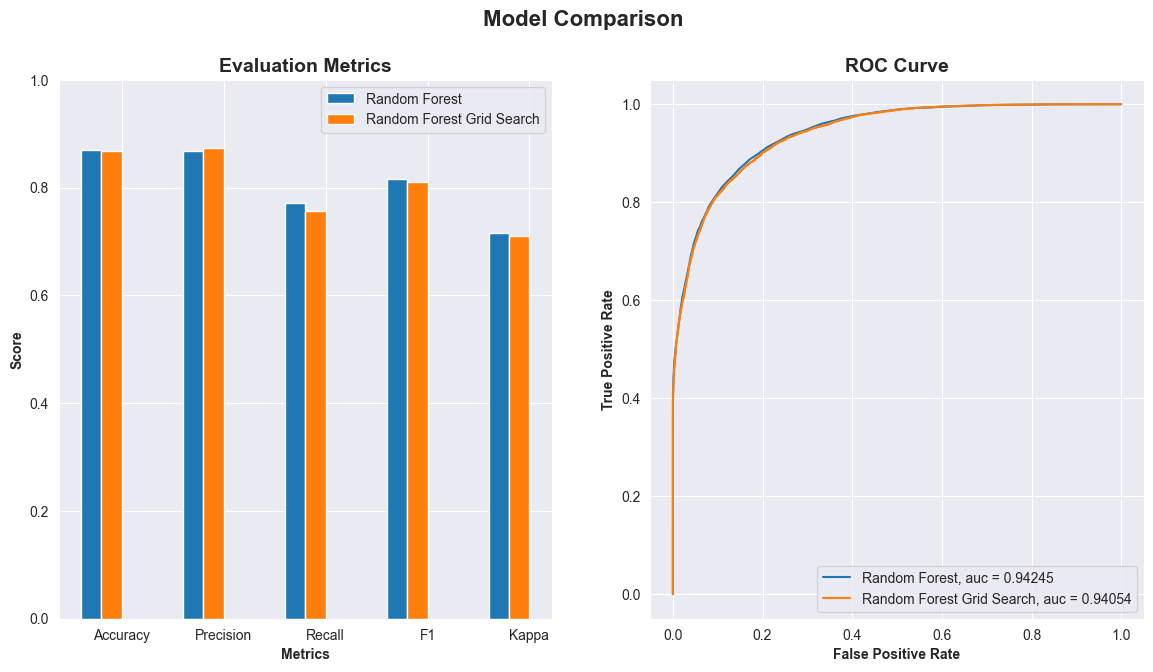

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

barWidth = 0.2
rf_score = [m_eval[1]['acc'], m_eval[1]['prec'], m_eval[1]['rec'], m_eval[1]['f1'], m_eval[1]['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]

ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest Grid Search')

ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

ax2.plot(m_eval[1]['fpr'], m_eval[1]['tpr'], label='Random Forest, auc = {:0.5f}'.format(m_eval[1]['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest Grid Search, auc = {:0.5f}'.format(best_grid_eval['auc']))
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()